In [3]:
import matplotlib.pyplot as plt
from utils.shabanipy.labber import LabberData
from utils.jy_mpl_settings.settings import jy_mpl_rc
from utils.jy_mpl_settings.colors import line_colors
import numpy as np
from scipy.optimize import curve_fit
import utils.fluxonium_functions as ff
plt.style.use(jy_mpl_rc)
root = '/Users/billystrickland/Documents/code/resonators/devices/fluxonium/paper_figures/data'

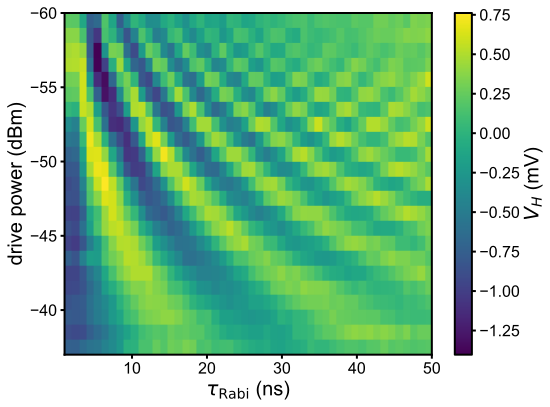

In [4]:
# Define the file number, sample, cooldown, people, and channels for data extraction.
file_num = '037'
sample = 'JS681-4fluxonium-005'
cooldown = '003'
people = 'BS'
channels = ['SC1 - Drive - Amplitude', 'Digitizer ShabLab - Ch3 - Signal', 'Digitizer ShabLab - Ch4 - Signal']

# Extract data from the specified file using 'ff.extract_data'. The data for the given channels is retrieved.
drive, I, Q = ff.extract_data(f'{root}/{sample}-{cooldown}-{people}-{file_num}.hdf5',
                                        channels=channels)

# Initialize an empty list for phase_2d (not used in this code).
phase_2d = []

# Extract unique values of drive power.
power = np.unique(drive)

# Calculate the average of the Q data across the third dimension.
Q_avg = np.mean(Q, axis=2)

# Average the Q data using the 'ff.average_data' function.
Q_avg = ff.average_data(Q_avg)

# Create a time array for the x-axis, scaled by 1e-9 to convert from ns to seconds.
time = np.linspace(1, len(Q_avg[0]), len(Q_avg[0])) * 1e-9

# Create a figure to plot the processed Q_avg data.
fig, ax = ff.plot_data(Q_avg[5:-2]*1e3, xlabel=r'$\tau_\mathrm{Rabi}$ (ns)',  # Set x-axis label.
                       ylabel='drive power (dBm)',  # Set y-axis label.
                       zlabel='$V_H$ (mV)',  # Set z-axis label.
                       xlim=[time[0]*1e9, time[-1]*1e9],  # Set x-axis limits in ns.
                       ylim=[power[-2]-56, power[5]-56],  # Set y-axis limits for drive power.
                       figsize=(8, 6))  # Set figure size.

# Adjust the layout to ensure everything fits within the plot.
plt.tight_layout()

# Save the figure as a PDF to the specified location.
plt.savefig(f'figs_final/fig5b.pdf', format='pdf')


A, T, freq, m, b, p =  [ 6.83563335e-01  4.54914648e-08  5.56235269e+07  5.13281016e+06
 -1.31115074e-01  6.28318531e+00]
measured meter swing =  -1.37 deg


Text(0.57, 0.35, '$T_2^{\\mathrm{Rabi}}$ = 45 ns')

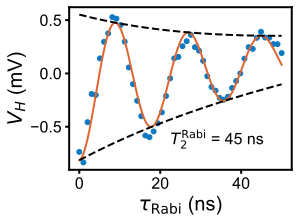

In [6]:
# Select the 9th-to-last row of the Q_avg array (representing a specific data set).
line = Q_avg[-9]

# Define the bounds for the fit parameters.
bounds = [
    [-50, 10e-9, 0, 1e-9, line[0] - 20, 0],  # Lower bounds for the fit.
    [50, 100e-9, 0.2e9, 1e9, line[0] + 20, 2 * np.pi]  # Upper bounds for the fit.
]

# Create a time array, scaled to nanoseconds.
time = np.linspace(0, len(line), len(line)) * 1e-9

# Perform a Rabi linecut fit on the data using 'ff.fit_rabi_linecut', passing the time, line data, and bounds.
# Also, specify the figure size for the plot.
popt, perr, fig, ax = ff.fit_rabi_linecut(time=time, signal=line*1e3, bounds=bounds, figsize=(4, 3))

# Annotate the plot with the value of T2_Rabi in ns, rounding the value to display.
plt.annotate('$T_2^{\mathrm{Rabi}}$ = ' + f'{round(popt[1]*1e9)} ns', xycoords='figure fraction', xy=(.57, .35))

# Save the resulting plot as a PDF to the specified location.
# plt.savefig('/Users/billystrickland/Library/CloudStorage/GoogleDrive-wms269@nyu.edu/My Drive/nyu/research/thesis/dissertation/qubit-tune-up/rablinecut_power_fluxonium.pdf', format='pdf')


A, T, freq, m, b, p =  [ 7.19914340e-01  1.00653946e-08  2.26346519e+08  1.32293361e+07
 -3.41159477e-01  1.92580311e+00]
measured meter swing =  -1.44 deg
A, T, freq, m, b, p =  [ 7.99998314e-01  1.41027212e-08  2.13807618e+08  1.34750829e+07
 -3.48106884e-01  1.78768266e+00]
measured meter swing =  -1.6 deg
A, T, freq, m, b, p =  [ 7.99989016e-01  1.98697552e-08  1.95194933e+08  1.07994364e+07
 -2.81341535e-01  1.70737351e+00]
measured meter swing =  -1.6 deg
A, T, freq, m, b, p =  [ 7.99999993e-01  2.34342296e-08  1.78575081e+08  1.30220681e+07
 -3.37146243e-01  1.68158498e+00]
measured meter swing =  -1.6 deg
A, T, freq, m, b, p =  [ 7.99999232e-01  2.99042271e-08  1.62968321e+08  1.61311982e+07
 -4.16139131e-01  1.52084864e+00]
measured meter swing =  -1.6 deg
A, T, freq, m, b, p =  [ 7.99999960e-01  3.58866386e-08  1.49541034e+08  1.42099819e+07
 -3.73204299e-01  1.40707803e+00]
measured meter swing =  -1.6 deg
A, T, freq, m, b, p =  [ 8.00000000e-01  4.31142452e-08  1.36773978e+

 /Users/billystrickland/Documents/code/resonators/devices/fluxonium/paper_figures/utils/fluxonium_functions.py: 44

A, T, freq, m, b, p =  [ 7.08739599e-01  2.69829905e-08  3.82134498e+07  6.52250386e+06
 -1.52118358e-01  1.73651040e-08]
measured meter swing =  -1.42 deg
A, T, freq, m, b, p =  [ 6.46243464e-01  2.61382325e-08  3.55001135e+07  1.32860598e+07
 -3.24217689e-01  1.09979415e-06]
measured meter swing =  -1.29 deg
A, T, freq, m, b, p =  [ 6.57178969e-01  1.99921709e-08  3.20484423e+07  6.77694939e+06
 -1.50090891e-01  3.89279931e-06]
measured meter swing =  -1.31 deg


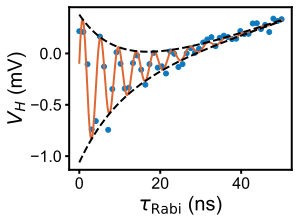

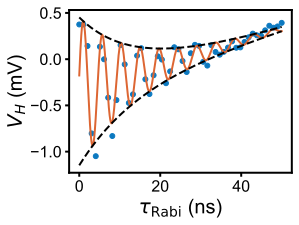

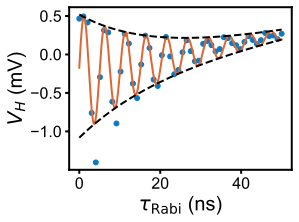

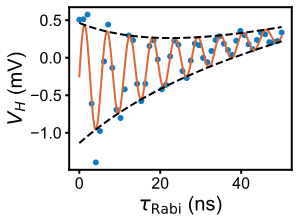

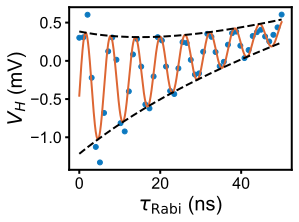

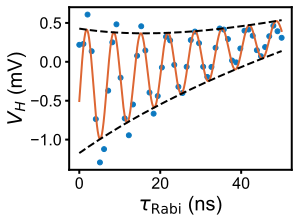

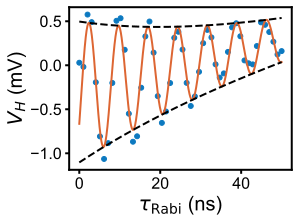

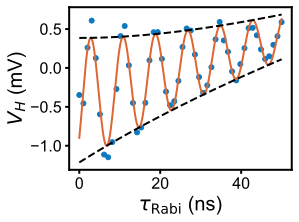

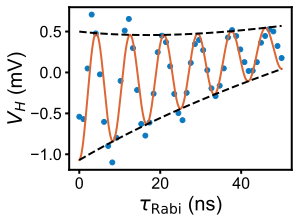

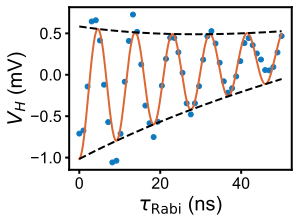

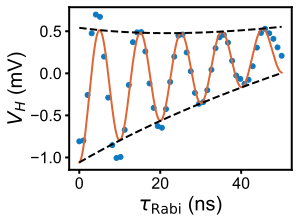

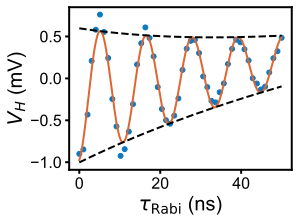

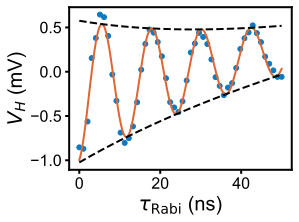

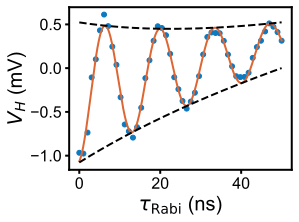

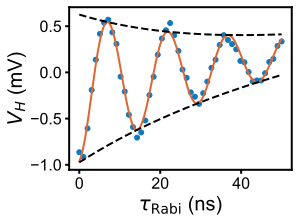

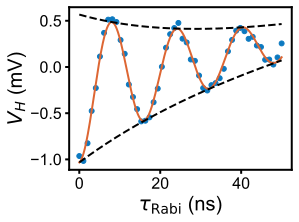

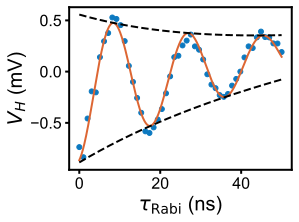

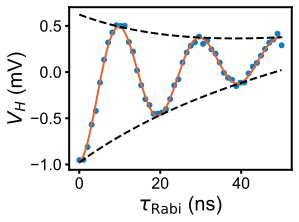

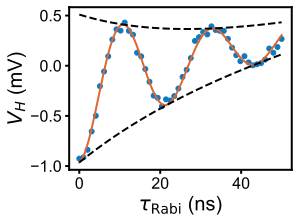

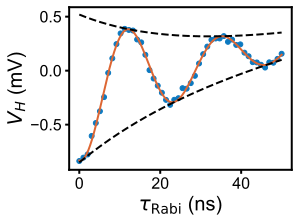

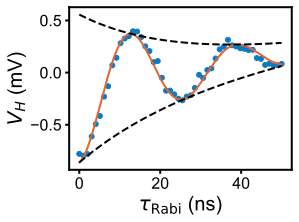

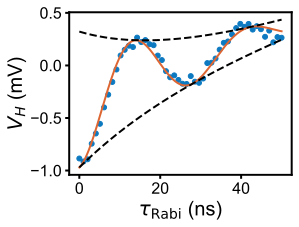

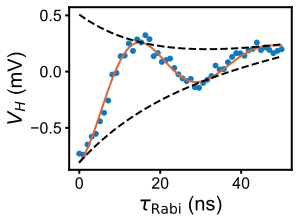

In [7]:
# Initialize empty lists to store frequency, T2, and drive power data
freqs_pow, freqs_pow_err, T2s_pow, T2s_pow_err = [], [], [], []
drive_pow = []

# Loop through the Q_avg data starting from index 5 and ending at index -2 (excluding last 2 elements).
for i, line in enumerate(Q_avg[5:-2]):
    
    # Set bounds for the fit parameters based on the index of the loop.
    bounds = [
        [2e-1, 10e-9, 0, 1e-9, line[0] - 20, 0],  # Lower bounds for fit
        [8e-1, 100e-9, 0.3e9, 1e9, line[0] + 20, 2 * np.pi]  # Upper bounds for fit
    ]
    
    # If index is greater than 10, adjust the bounds.
    if i > 10:
        bounds = [
            [2e-1, 10e-9, 0, 1e-9, line[0] - 20, 0],  # Lower bounds for fit
            [8e-1, 100e-9, 1e8, 1e9, line[0] + 20, 2 * np.pi]  # Upper bounds for fit
        ]
    
    # Generate time vector scaled in nanoseconds.
    time = np.linspace(0, len(line), len(line)) * 1e-9

    # Perform a Rabi linecut fit using 'ff.fit_rabi_linecut', passing the time and signal data, with bounds.
    popt, perr, fig, ax = ff.fit_rabi_linecut(time=time, signal=line * 1e3, bounds=bounds, figsize=(4, 3))
    
    # Append the results of the fit to respective lists.
    drive_pow.append(power[i + 5])  # Corresponding drive power
    freqs_pow.append(popt[2])  # Extracted frequency from the fit
    freqs_pow_err.append(perr[2])  # Frequency error
    T2s_pow.append(popt[1])  # Extracted T2 value from the fit
    T2s_pow_err.append(perr[1])  # T2 error


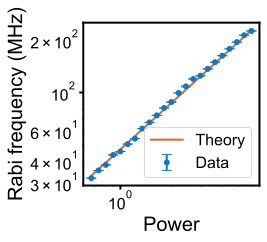

In [8]:
fig, ax = plt.subplots(figsize=(4, 3.5))

# Transform the drive power and plot the data with error bars
x_data = np.exp((np.array(drive_pow[::-1])) / 10)
plt.errorbar(x_data, np.array(freqs_pow) * 1e-6, yerr=np.array(freqs_pow_err) * 1e-6, fmt='.', label='Data', capsize=5)

# Set plot labels and scale
plt.xlabel('Power')
plt.xscale('log')

# Define the model function for fitting
def model(x, A, b):
    return A * x**b

# Fit the model to the data
popt, pcov = curve_fit(model, x_data, freqs_pow, sigma=freqs_pow_err)

# Generate fitted curve
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = model(x_fit, *popt)

# Plot the fitted theory curve
plt.plot(x_fit, y_fit * 1e-6, label='Theory')

# Set labels for the y-axis, set y-scale to log, and add a legend
plt.ylabel('Rabi frequency (MHz)')
plt.yscale('log')
plt.legend()

# Tight layout and save the figure as an EPS file
plt.tight_layout()
plt.savefig('/Users/billystrickland/Google Drive/My Drive/nyu/research/thesis/defense/figures/rabi_power_cal.eps', format='eps')


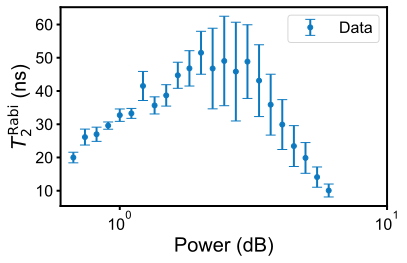

In [9]:
fig, ax = plt.subplots()

# Transform the drive power and plot the data with error bars
x_data = np.exp((np.array(drive_pow[::-1])) / 10)
plt.errorbar(x_data, np.array(T2s_pow) * 1e9, yerr=np.array(T2s_pow_err) * 1e9, fmt='.', label='Data', capsize=5)

# Set plot labels and scale
plt.xlabel('Power (dB)')
plt.xscale('log')
plt.ylabel('$T_2^\mathrm{Rabi}$ (ns)')

# Set custom x-ticks
plt.xticks([1, 10])

# Add tight layout and legend
plt.tight_layout()
plt.legend()

# Save the figure as an EPS file
plt.savefig('/Users/billystrickland/Google Drive/My Drive/nyu/research/thesis/defense/figures/rabi_power_time.eps', format='eps')


In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Make sure 'root', 'sample', and 'people' are set correctly in your code
# Example (adjust accordingly to your file path and settings):
# root = "/path/to/your/data/directory"
# sample = 'JS801-4fluxonium@v5-01'
# people = 'WMSLJB'

# Extract the data from the HDF5 file
file_num = '459'
cooldown = '002'

channels = ['SC1 - Drive - Frequency', 'Digitizer ShabLab - Ch3 - Signal', 'Digitizer ShabLab - Ch4 - Signal']
drive, I, Q = ff.extract_data(f'{root}/{sample}-{cooldown}-{people}-{file_num}.hdf5', channels=channels)

# Process the data
drive = np.unique(drive)
I_avg = np.mean(I, axis=2)[::-1]
I_avg = ff.average_data(I_avg)  # Assuming this function averages the data appropriately

# Time vector (assuming the time base is consistent across samples)
time = np.linspace(1, len(I_avg[0]), len(I_avg[0])) * 1e-9  # Convert to nanoseconds

# Plot the data
fig, ax = ff.plot_data(
    I_avg * 1e3,  # Convert to mV (if appropriate)
    xlabel=r'$\tau_\mathrm{Rabi}$ (ns)',
    ylabel='Drive Frequency (GHz)',
    zlabel='$V_H$ (mV)', 
    xlim=[time[0] * 1e9, time[-1] * 1e9],  # Time in nanoseconds on the x-axis
    ylim=[drive[0] * 1e-9, drive[-1] * 1e-9],  # Drive frequency in GHz on the y-axis
    figsize=(8, 6)
)

# Improve layout and save the figure
plt.tight_layout()

# Save the figure as a PDF
output_path = 'figs_final/fig5a.pdf'
plt.savefig(output_path, format='pdf')

# Optionally, you can close the plot after saving to free memory
plt.close()


A, T, freq, m, b, p =  [ 3.84763405e-01  9.34140037e-08  1.16960983e+08 -2.43145428e+05
  1.03925147e-02  4.09126523e+00]
measured meter swing =  -0.77 deg


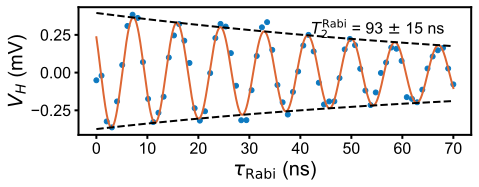

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Ensure signal is correctly defined
signal = I_avg[-15]  # Make sure 'I_avg' is defined correctly

# Define time axis in nanoseconds (adjust as per your data)
time = np.linspace(0, len(signal), len(signal)) * 1e-9  # Time in ns

# Define bounds for the fitting
bounds = [
    [0, 10e-9, 0, -1e9, signal[0] - 1, 0],  # Lower bounds for the fitting parameters
    [1, 100e-9, 0.3e9, 1e9, signal[0] + 1, 2 * np.pi]  # Upper bounds
]

# Perform the fitting
popt, perr, fig, ax = ff.fit_rabi_linecut(time=time, signal=signal * 1e3, bounds=bounds, figsize=(7, 3))

# Annotate the figure with the fitted T2 value and its error
plt.annotate(
    '$T_2^{\mathrm{Rabi}}$ = ' + f'{round(popt[1] * 1e9)} $\pm$ {round(perr[1] * 1e9)} ns',
    xycoords='figure fraction', xy=(0.65, 0.82)
)

# Collect the fitted frequencies and T2 values for further analysis (if needed)
freqs.append(popt[2])
freqs_err.append(perr[2])
t2s.append(popt[1])
t2s_err.append(perr[1])

# Improve layout and save the figure
fig.tight_layout()

# Save the figure as an EPS file (adjust path as necessary)
plt.savefig('/Users/billystrickland/Google Drive/My Drive/nyu/research/thesis/defense/figures/rabi_line.eps', format='eps')

# Optionally, close the plot to free memory (useful if generating many plots)
plt.close()


A, T, freq, m, b, p =  [ 5.27938183e-02  1.00000000e-08  1.18731214e+08  8.32968080e+05
 -2.82297355e-02  5.73749294e+00]
measured meter swing =  -0.11 deg
A, T, freq, m, b, p =  [ 7.51374841e-02  1.00000000e-08  1.69668492e+08  6.50017921e+05
 -2.18392526e-02  5.91915023e+00]
measured meter swing =  -0.15 deg
A, T, freq, m, b, p =  [ 7.53684559e-02  1.00000000e-08  1.43732639e+08  3.04522861e+06
 -1.05549688e-01  5.89635784e+00]
measured meter swing =  -0.15 deg
A, T, freq, m, b, p =  [ 6.07158031e-02  1.00000000e-08  1.22723024e+08  1.51364496e+06
 -5.20188084e-02  5.85496261e+00]
measured meter swing =  -0.12 deg
A, T, freq, m, b, p =  [ 7.11857822e-02  1.00000000e-08  1.92007295e+08  7.18117691e+05
 -2.45480928e-02  1.83063702e-17]
measured meter swing =  -0.14 deg
A, T, freq, m, b, p =  [ 4.67541709e-02  1.00000000e-08  1.25938037e+08  8.81138860e+05
 -3.01068053e-02  5.83707382e+00]
measured meter swing =  -0.09 deg
A, T, freq, m, b, p =  [ 6.70745735e-02  1.00000000e-08  1.74570

 /Users/billystrickland/Documents/code/resonators/devices/fluxonium/paper_figures/utils/fluxonium_functions.py: 44

A, T, freq, m, b, p =  [ 1.47025170e-02  5.27261006e-08  1.37373301e+08  3.05631494e+05
 -1.06457415e-02  6.28318531e+00]
measured meter swing =  -0.03 deg
A, T, freq, m, b, p =  [ 5.70718909e-02  1.00000000e-08  1.62963112e+08  1.71198560e+06
 -5.98092676e-02  4.78937377e-01]
measured meter swing =  -0.11 deg
A, T, freq, m, b, p =  [ 1.14205569e-01  1.00000000e-08  9.97401499e+07  3.13647440e+05
 -9.74839966e-03  6.28318531e+00]
measured meter swing =  -0.23 deg
A, T, freq, m, b, p =  [ 9.98622190e-02  1.00000000e-08  1.12138515e+08  7.79969400e+05
 -2.62967437e-02  6.28318531e+00]
measured meter swing =  -0.2 deg
A, T, freq, m, b, p =  [ 1.20046252e-01  1.00000000e-08  1.18661749e+08  2.24016220e+05
 -6.66780587e-03  6.28318531e+00]
measured meter swing =  -0.24 deg
A, T, freq, m, b, p =  [ 1.06628845e-01  1.00000000e-08  1.38217427e+08  4.48145533e+05
 -1.44304087e-02  6.09228130e+00]
measured meter swing =  -0.21 deg
A, T, freq, m, b, p =  [ 1.03024201e-01  1.00000000e-08  1.256474

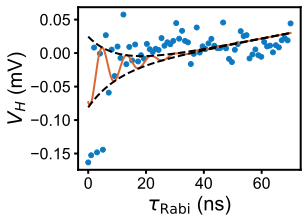

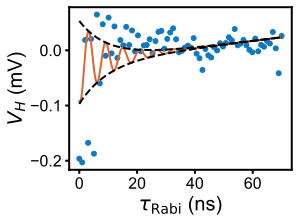

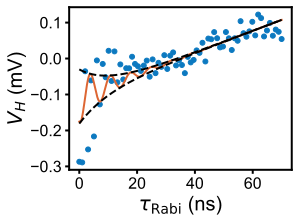

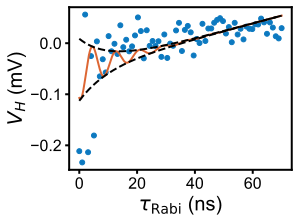

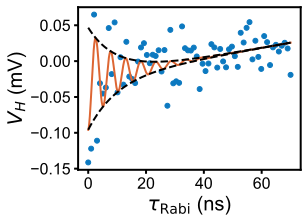

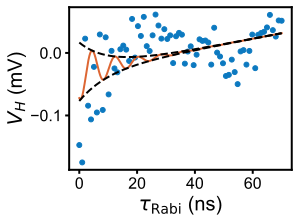

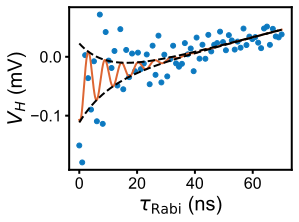

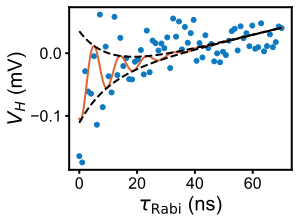

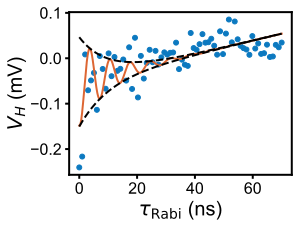

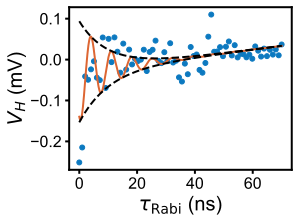

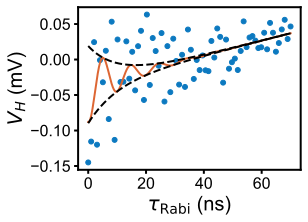

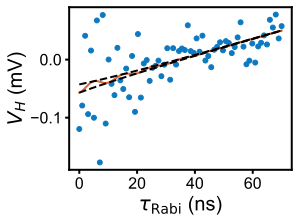

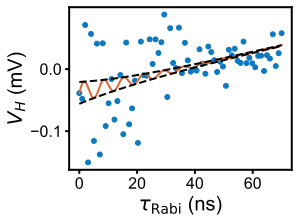

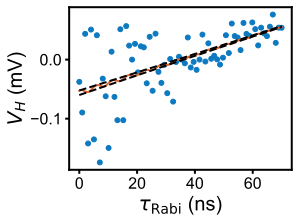

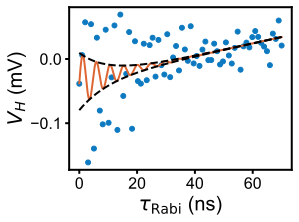

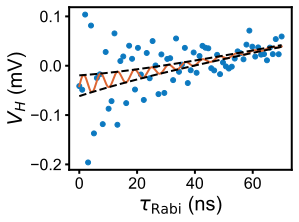

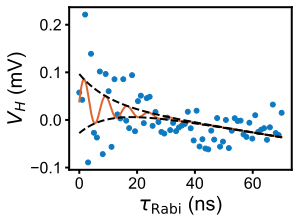

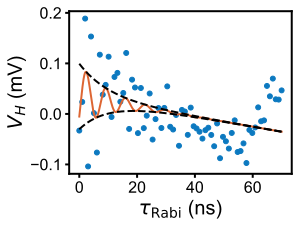

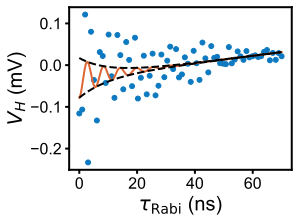

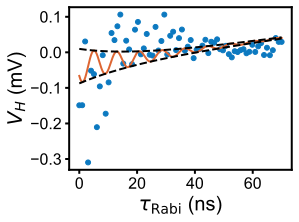

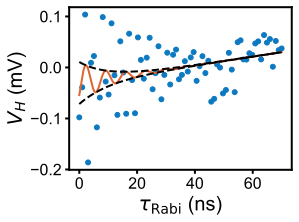

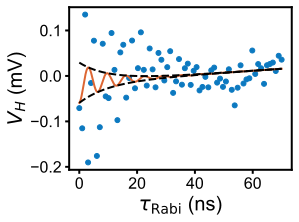

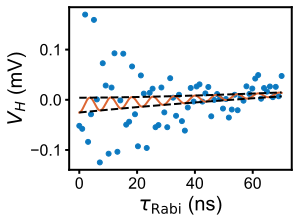

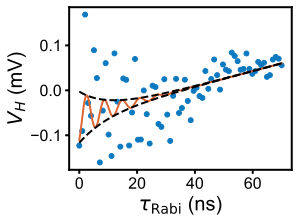

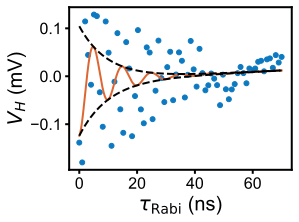

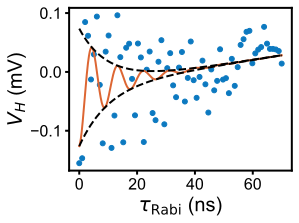

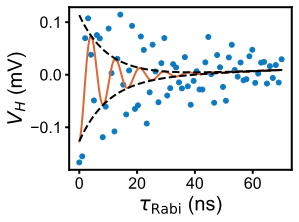

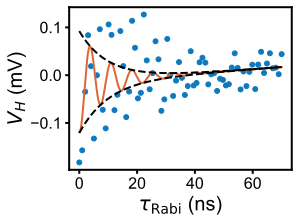

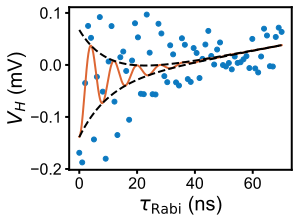

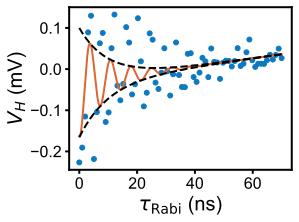

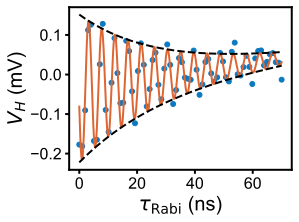

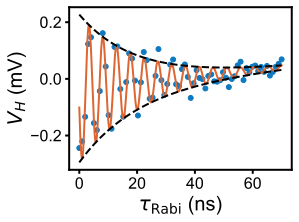

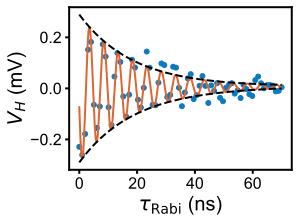

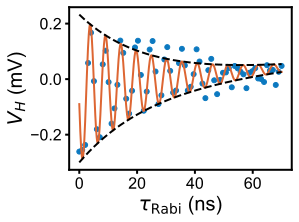

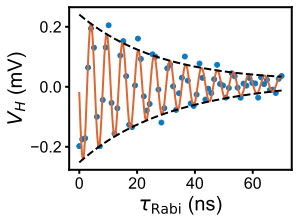

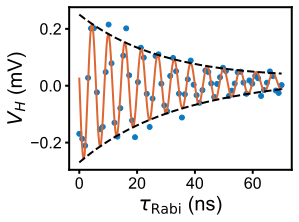

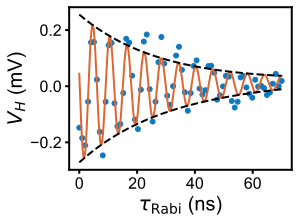

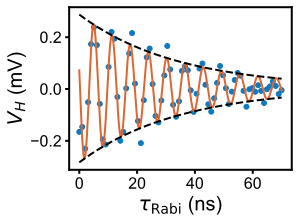

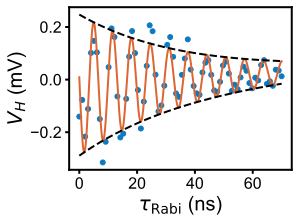

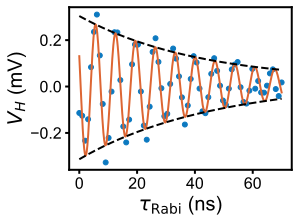

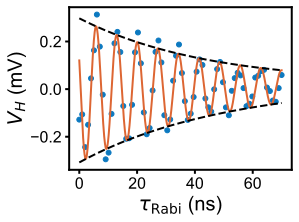

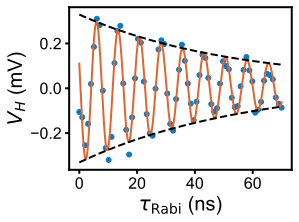

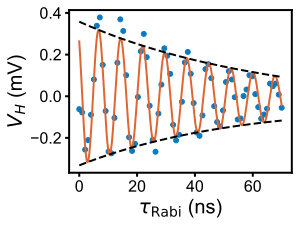

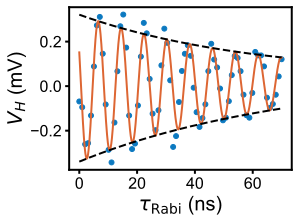

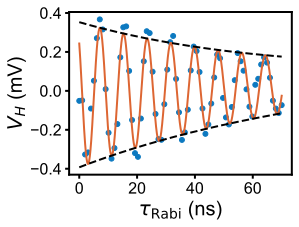

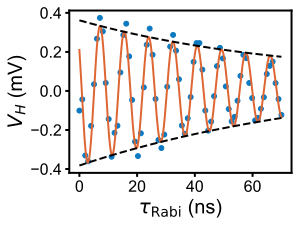

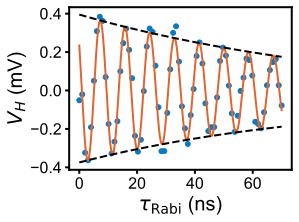

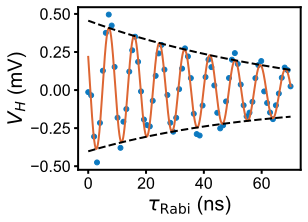

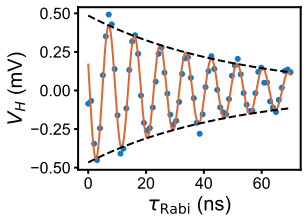

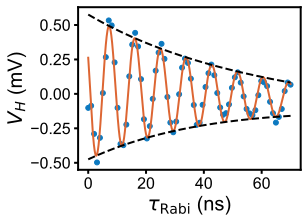

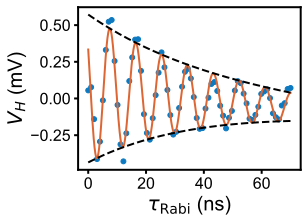

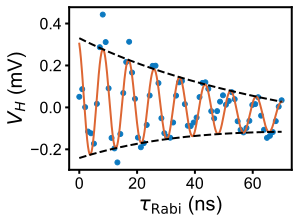

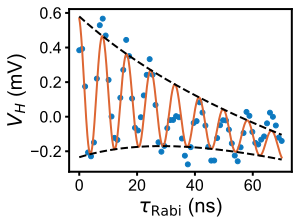

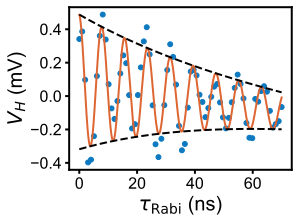

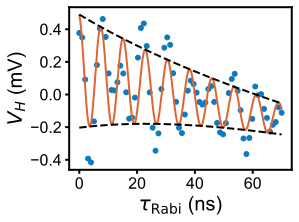

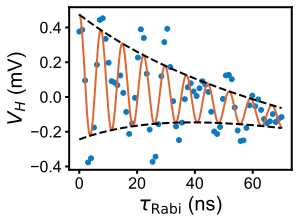

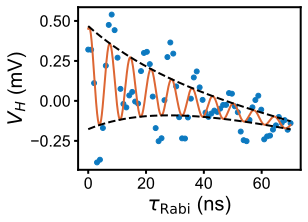

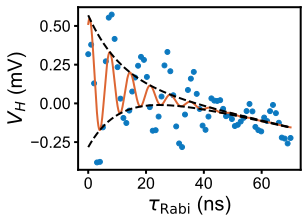

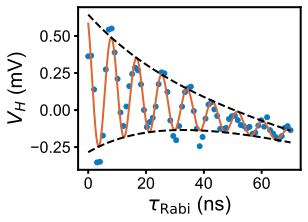

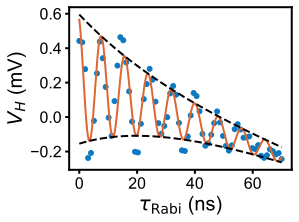

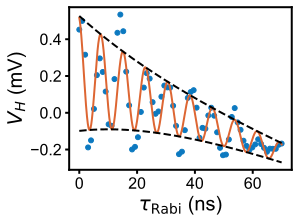

In [16]:
# Initialize lists to store the fitted parameters and errors
freqs, t2s = [], []
freqs_err, t2s_err = [], []

# Iterate over each time-domain signal (line) in I_avg
for line in I_avg:
    # Initial guess for the frequency (this might need to be adjusted based on your data)
    init_freq = 0.3e9  # Example initial guess (adjust as needed)
    
    # Define bounds for the fit parameters
    bounds = [
        [0, 10e-9, 0, -1e9, line[0] - 1, 0],  # Lower bounds
        [1, 100e-9, 0.3e9, 1e9, line[0] + 1, 2 * np.pi]  # Upper bounds
    ]
    
    # Create a time array based on the length of the current signal line (in nanoseconds)
    time = np.linspace(0, len(line), len(line)) * 1e-9  # Time in nanoseconds
    
    # Fit the Rabi linecut data using the specified bounds and initial guesses
    popt, perr, fig, ax = ff.fit_rabi_linecut(
        time=time, 
        signal=line * 1e3,  # Convert the signal units to millivolts (assuming original is in volts)
        bounds=bounds, 
        figsize=(4, 3)  # Figure size (adjust as needed)
    )
    
    # Append the fitted parameters (frequency and T2) and their errors
    freqs.append(popt[2])  # Populated frequency value from the fit
    freqs_err.append(perr[2])  # Frequency error estimate
    t2s.append(popt[1])  # T2 value from the fit
    t2s_err.append(perr[1])  # T2 error estimate

# At this point, freqs, freqs_err, t2s, and t2s_err contain the fitted values for each line.
# Optionally, you can plot the results or perform further analysis.


Fitted parameters: a = 0.9208273663797754, b = 120580305.40361185


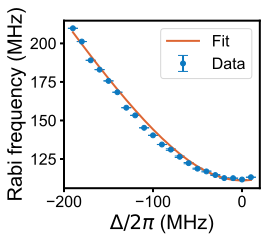

In [17]:

fig, ax = plt.subplots(figsize = (4, 3.5))
x_data = drive[31:-9]-drive[np.argmin(freqs[31:-9])+31]
y_data = np.array(freqs[31:-9])

yerr = np.array(freqs_err[31:-9])
plt.errorbar(x_data*1e-6, y_data*1e-6, yerr = yerr*1e-6,marker = '.', linestyle = 'None', capsize=5, label = 'Data')
def model(x, a, b):
    return a * np.sqrt(x**2 + b**2)

# Fit the model to the data
params, covariance = curve_fit(model, x_data, y_data,sigma = yerr, p0=[1, 1])

# Extract the fitted parameters
a_fit, b_fit = params
print(f"Fitted parameters: a = {a_fit}, b = {b_fit}")

# Generate the fitted curve
y_fit = model(x_data, *params)

plt.plot(x_data*1e-6, y_fit*1e-6, 
#          label='Fit: $\Omega = {:.2f}\sqrt{{\Delta^2 +  {:.2f}^2 }}$'.format(popt[0]*1e-6, popt[1])
         label = 'Fit'
        )
plt.xlabel('$\Delta/2\pi$ (MHz)')
plt.ylabel(r'Rabi frequency (MHz)')

plt.legend()
# fig, ax = plt.subplots()
# plt.plot(np.array(t2s[20::])*1e9, marker = 'o')
# plt.ylabel('T2Rabi (ns)')
plt.tight_layout()
plt.savefig('/Users/billystrickland/Google Drive/My Drive/nyu/research/thesis/defense/figures/rabi_frequency_frequency.eps', format = 'eps')

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have pre-calculated the necessary data (drive, freqs, t2s, t2s_err, etc.)

fig, ax = plt.subplots(figsize=(4, 3.5))

# Extracting x and y data for plotting
x_data = drive[31:-9] - drive[np.argmin(freqs[31:-9]) + 31]
y_data = np.array(t2s[31:-9])
yerr = np.array(t2s_err[31:-9])

# Plotting
plt.ylabel('$T_2^\mathrm{Rabi}$ (ns)')
plt.xlabel('$\Delta/2\pi$ (MHz)')
plt.errorbar(x_data * 1e-6, y_data * 1e9, yerr=yerr * 1e9, marker='.', linestyle='None', capsize=5)

# Adjust layout and save the figure
plt.tight_layout()

# File path (change it as needed)
file_path = '/Users/billystrickland/Google Drive/My Drive/nyu/research/thesis/defense/figures/rabi_frequency_time.eps'

# Save the figure
plt.savefig(file_path, format='eps')

# Optionally, you can close the plot to free memory
plt.close()
